#### Check for missing dates

In [21]:
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

# Adding a filter to the DataFrame for clarifying the bushel weight in the column 'Package'
# The filter will only keep the rows where the 'Package' column contains the word 'bushel'
# The regex=True parameter allows for a regular expression search
# The case=True parameter makes the search case-sensitive
# This means that only rows with 'bushel' in the 'Package' column will be retained
# The result is stored back in the pumpkins DataFrame
# This is useful for analyzing only the data relevant to bushel weights
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


✅ What function would you use to view the last five rows?

Ans: The built-in method tail()

In [22]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [23]:
# Check if there is missing data in the current dataframe
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

Make dataframe easier to work with, select only the columns you need, using `loc` function which extracts from the original dataframe a group of rows (passed as first parameter) and columns (passed as second parameter). The expression `:` in the case below means "all rows".

In [24]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [25]:
# Determine average price of pumpkin and month of sale

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [26]:
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [27]:
# Copy converted data into a fresh Pandas dataframe

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

In [28]:
print(new_pumpkins.head())

    Month               Package  Low Price  High Price  Price
70      9  1 1/9 bushel cartons       15.0        15.0   15.0
71      9  1 1/9 bushel cartons       18.0        18.0   18.0
72     10  1 1/9 bushel cartons       18.0        18.0   18.0
73     10  1 1/9 bushel cartons       17.0        17.0   17.0
74     10  1 1/9 bushel cartons       15.0        15.0   15.0


In [29]:
print(new_pumpkins.tail())

      Month             Package  Low Price  High Price   Price
1738      9  1/2 bushel cartons      15.00        15.0  15.000
1739      9  1/2 bushel cartons      13.75        15.0  14.375
1740      9  1/2 bushel cartons      10.75        15.0  12.875
1741      9  1/2 bushel cartons      12.00        12.0  12.000
1742      9  1/2 bushel cartons      12.00        12.0  12.000


In [30]:
# Normalize the pricing so that the pricing per bushel, so let's do some math to standardize it.

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [31]:
# Data Visualization
import matplotlib.pyplot as plt

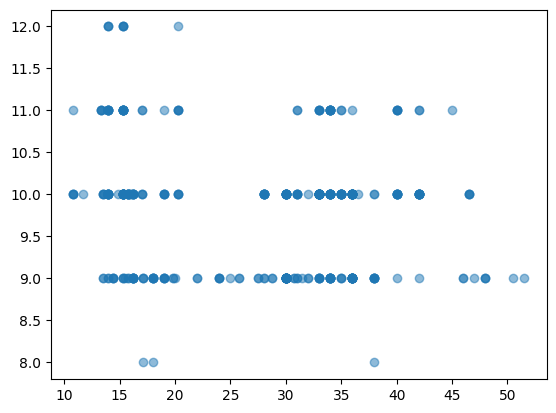

In [32]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month, alpha=0.5)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

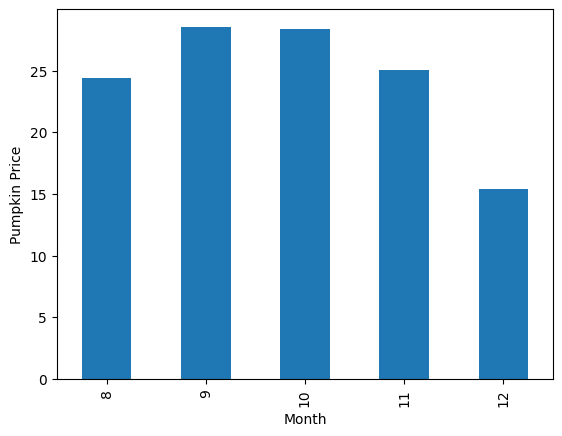

In [33]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

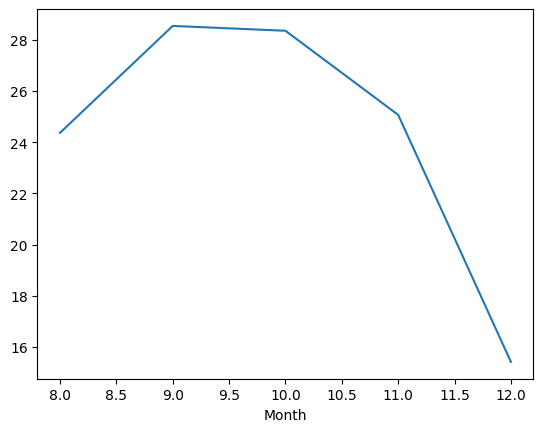

In [36]:
# Line Plot

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='line')
plt.show()

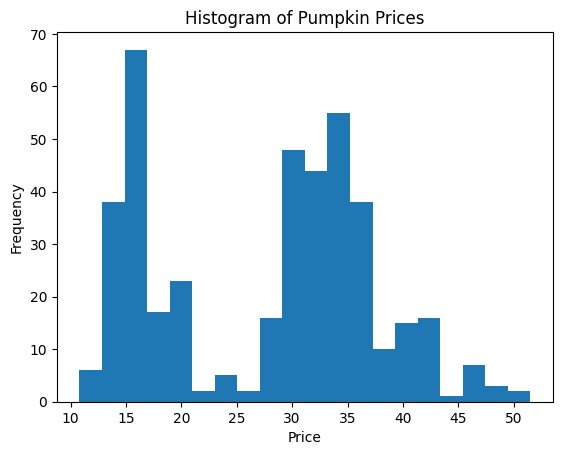

In [40]:
# Histogram
plt.hist(new_pumpkins['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Pumpkin Prices')
plt.show()

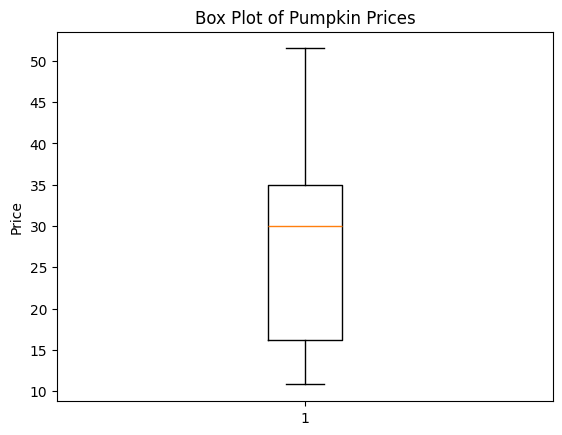

In [41]:
# Box Plot
plt.boxplot(new_pumpkins['Price'])
plt.ylabel('Price')
plt.title('Box Plot of Pumpkin Prices')
plt.show()

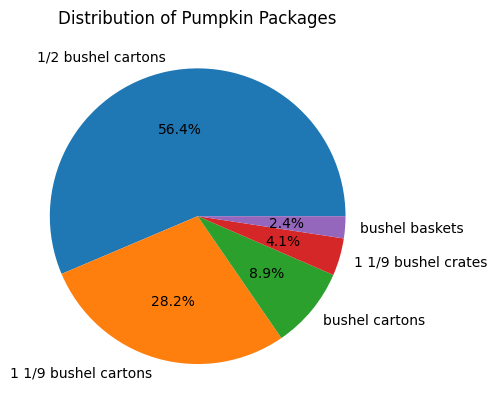

In [43]:
# Pie Chart
pumpkin_counts = new_pumpkins['Package'].value_counts()
pumpkin_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Pumpkin Packages')
plt.show()